# Training CNN model using CIFAR-10 Dataset

In [107]:
!pip install tensorflow matplotlib numpy Pillow



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [135]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.layers import Dense , Dropout , Conv2D , MaxPooling2D, Flatten , BatchNormalization

In [111]:
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.cifar10.load_data()

In [113]:
print('x_train shape' , x_train.shape)
print('y_train shape' , y_train.shape)

x_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)


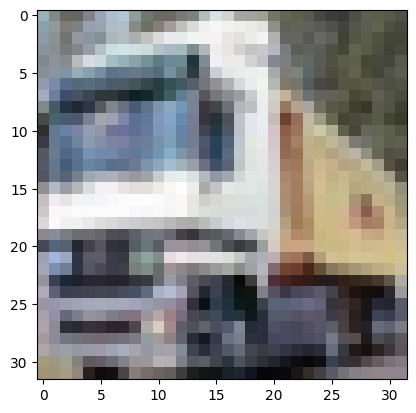

In [115]:
plt.imshow(x_train[1])

In [117]:
def normalize(x):
    x = x.astype('float32')
    x = x/255.0
    return x

In [119]:
datagen = ImageDataGenerator(
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
)

In [121]:
from sklearn.model_selection import train_test_split
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size = 0.5, random_state = 0)

In [123]:
x_train = normalize(x_train)
x_test = normalize(x_test)
x_val = normalize(x_val)

y_train = tf.keras.utils.to_categorical(y_train , 10)
y_test = tf.keras.utils.to_categorical(y_test , 10)
y_val  = tf.keras.utils.to_categorical(y_val , 10)

datagen.fit(x_train)

In [125]:

def results(model):
    epoch = 100
    r = model.fit(
        datagen.flow(x_train, y_train, batch_size=32), 
        epochs=epoch,
        steps_per_epoch=int(len(x_train) / 32), 
        validation_data=(x_val, y_val), 
        verbose=1
    )
    acc = model.evaluate(x_test, y_test)
    print("Test set loss:", acc[0])
    print("Test set accuracy:", acc[1]*100)

    # Plot training & validation accuracy values
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, r.history['accuracy'])
    plt.plot(epoch_range, r.history['val_accuracy'])
    plt.title('Classification Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='lower right')
    plt.show()

    # Plot training & validation loss values
    plt.plot(epoch_range, r.history['loss'])
    plt.plot(epoch_range, r.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='lower right')
    plt.show()


In [127]:
weight_decay = 1e-4
model = Sequential([
                    Conv2D(32, (3, 3), activation='relu', padding='same',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), input_shape=(32, 32, 3)),
	                BatchNormalization(),
                    Conv2D(32, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
	                BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.2),
                    Conv2D(64, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
	                BatchNormalization(),
                    Conv2D(64, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.3),
                    Conv2D(128, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
	                BatchNormalization(),
                    Conv2D(128, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.3),
	                Flatten(),
	                Dense(128, activation='relu'),
                    Dense(10, activation='softmax')                    
])

opt =    tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/100
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1625s 1s/step - accuracy: 0.4391 - loss: 1.5629 - val_accuracy: 0.5020 - val_loss: 1.4164
Epoch 2/100
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3438 - loss: 1.5053 - val_accuracy: 0.5042 - val_loss: 1.4124
Epoch 3/100
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 269s 172ms/step - accuracy: 0.5147 - loss: 1.3710 - val_accuracy: 0.5886 - val_loss: 1.1801
Epoch 4/100
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5000 - loss: 1.1793 - val_accuracy: 0.5910 - val_loss: 1.1757
Epoch 5/100
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 129s 82ms/step - accuracy: 0.5677 - loss: 1.2312 - val_accuracy: 0.6260 - val_loss: 1.0775
Epoch 6/100
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5938 - loss: 1.0569 - val_accuracy: 0.6300 - val_loss: 1.0708
Epoch 7/100
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - accuracy: 0.6094 - loss: 1.1255 - val_accuracy: 0.6140 - val_loss: 1.1392
Epoch 8/100
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5

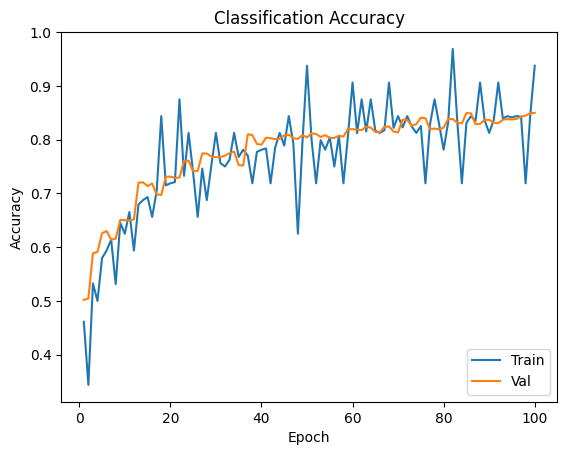

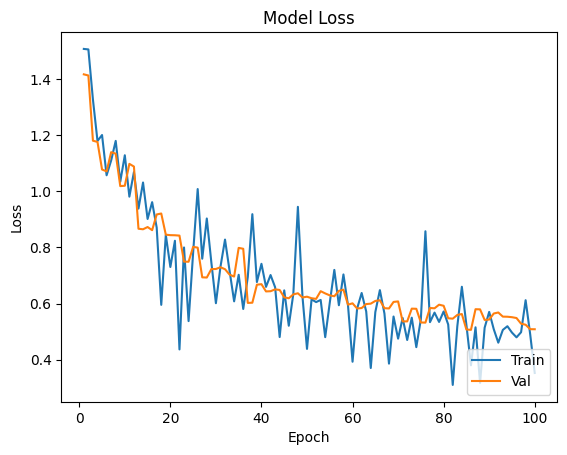

In [131]:
results(model)

In [ ]:
model.save("my_model.hdf5")